In [1]:
import re
import string
import warnings

import matplotlib
import matplotlib as plt
import nltk
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pylab import *
from scipy.cluster.hierarchy import dendrogram, fcluster, ward
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
en_stopwords = stopwords.words('english')
en_stopwords += list(string.printable)

news_data = fetch_20newsgroups(
    subset='train',
    shuffle=True,
    random_state=42,
    download_if_missing=True)

[nltk_data] Downloading package punkt to /home/shane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/shane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/shane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.DataFrame()
df['text'] = newsgroups_data_sample.data
df

NameError: name 'newsgroups_data_sample' is not defined

In [ ]:
en_stopwords = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: x.lower())
df['cleaned_text'] = df['text'].apply(
    lambda x: ' '.join(map(lemmatizer.lemmatize, filter(lambda word: word not in en_stopwords, word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))))))
)
df.head()

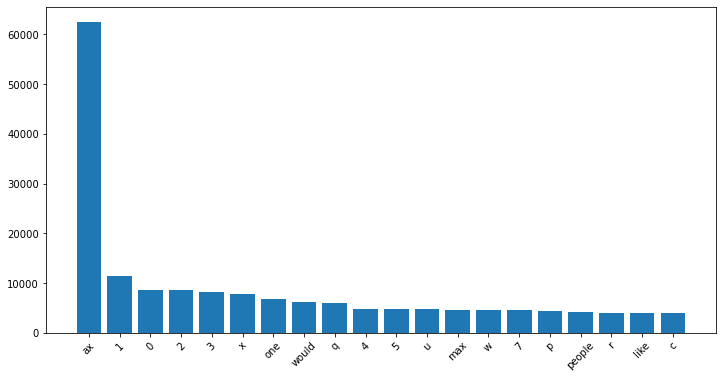

In [ ]:
from itertools import chain
from collections import Counter
top_20 = dict(sorted(Counter(list(chain.from_iterable(df['cleaned_text'].apply(lambda x: x.split())))).items(), key=lambda x: x[1], reverse=True)[:20])
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.bar(top_20.keys(), top_20.values())
plt.show()

In [ ]:
tfidf_model = TfidfVectorizer(max_features=1000)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,000,01,02,04,0d,0t,10,100,11,...,write,writing,written,wrong,xt,year,yes,yet,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.101425,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.201931,0.0,0.0


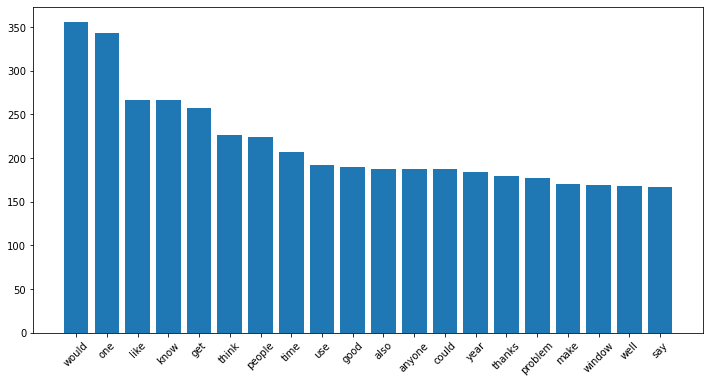

In [ ]:
top_20 = dict(sorted(dict(tfidf_df.sum(axis=0)).items(), key=lambda x: x[1], reverse=True)[:20])
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.bar(top_20.keys(), top_20.values())
plt.show()